In [9]:
from sklearn.datasets import fetch_california_housing


In [10]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# Display first few rows
print(df.head())

# Dataset info
print(df.info())

# Summary
print(df.describe())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

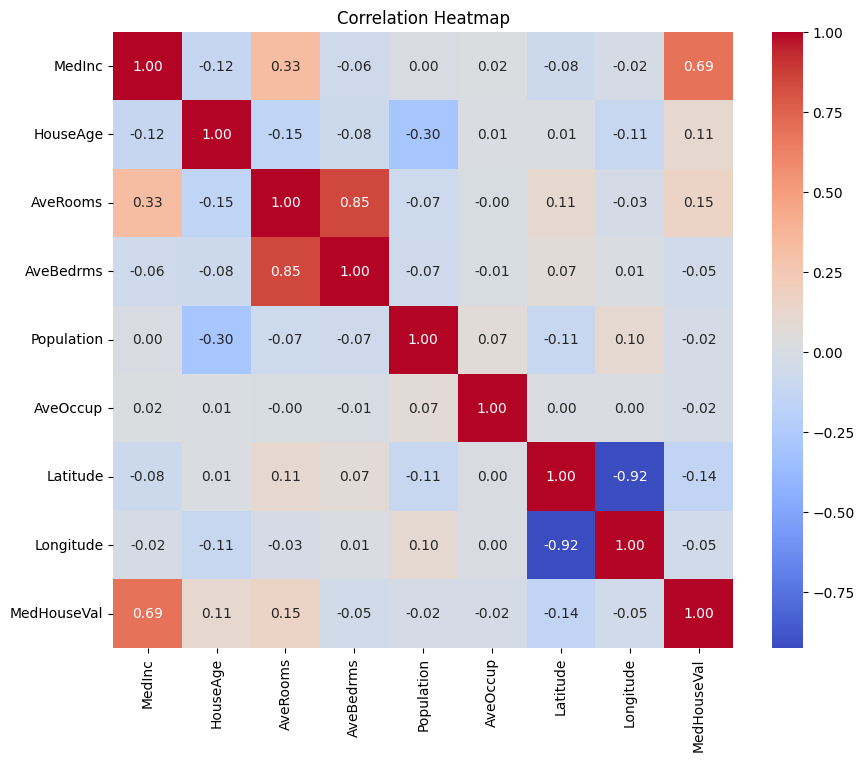

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split into features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Intercept: -37.02327770606409
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
R² Score: 0.5757877060324508
MAE: 0.5332001304956553
MSE: 0.5558915986952444
RMSE: 0.7455813830127764


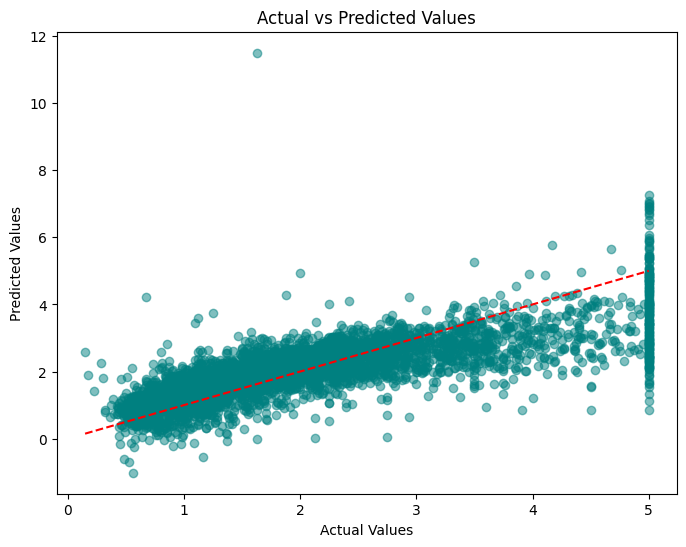

In [13]:
# Scatter plot of predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.show()


In [14]:
# Select top correlated features
top_features = correlation_matrix['MedHouseVal'].abs().sort_values(ascending=False)[1:6].index.tolist()
print("Top Correlated Features:", top_features)

X_top = df[top_features]


Top Correlated Features: ['MedInc', 'AveRooms', 'Latitude', 'HouseAge', 'AveBedrms']


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top)

# Split with top features
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model_improved = LinearRegression()
model_improved.fit(X_train_top, y_train_top)

# Predictions
y_pred_top = model_improved.predict(X_test_top)

# New evaluation metrics
print("Improved R² Score:", r2_score(y_test_top, y_pred_top))
print("Improved MAE:", mean_absolute_error(y_test_top, y_pred_top))
print("Improved MSE:", mean_squared_error(y_test_top, y_pred_top))
print("Improved RMSE:", np.sqrt(mean_squared_error(y_test_top, y_pred_top)))


Improved R² Score: 0.5129333248216975
Improved MAE: 0.5796603458789069
Improved MSE: 0.6382565441555915
Improved RMSE: 0.798909596985536


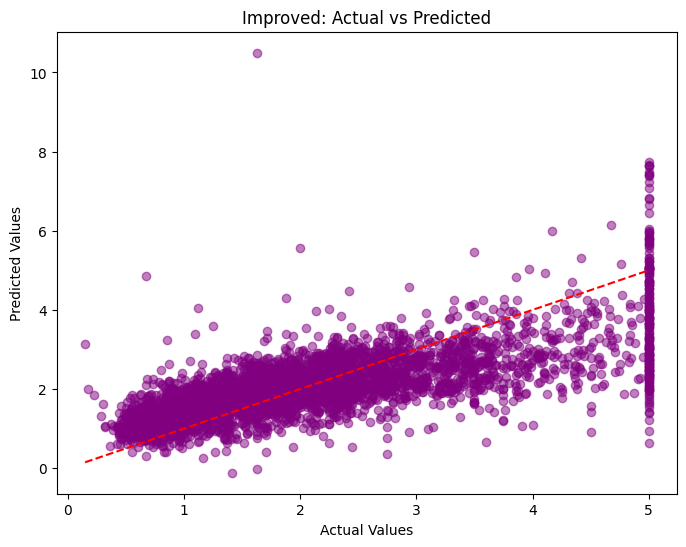

In [18]:
# Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test_top, y_pred_top, alpha=0.5, color='purple')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Improved: Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.show()
